# Module 13 -  Sampling

**_Author: Jessica Cervi_**

**Expected time = 2 hours**

**Total points = 55 points**


   
## Assignment Overview


Accurate predictions in data science require a large amount of data about the population of interest. However, data scientists are usually only able to access data from _samples_ within a population. In order to draw robust and reproducible conclusions, it's important to understand how information about a sample of data can differ from the population, how to assess the robustness of a sample, and how to evaluate individual data points within the sample. 

To ensure a sample of data is representative of the poulation, you must be able to determine how many data points are necessary to draw accurate conclusions and develop strategies for collecting robust samples.



This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
- Do not use a library unless you are expicitly asked to in the question. 
- You can download the Grading Report after submitting the assignment. This will include feedback and hints on incorrect questions. 


### Learning Objectives

- Define the Central Limit Theorem (CLT)
- Estimate the mean of the broader population based on a sample of data
- Calculate _confidence intervals_ indicating the confidence that a population mean falls within a specific range
- Calculate the minimum number of data points (or _sample_ ) necessary to confidently draw conclusions

 

## Index:

#### Module 13: Sampling

- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)
- [Question 9](#q9)

## Module 13: Sampling


In this assignment, you will use two data sets. The first is a data set called `polls`, which includes results from 5 political polls assessing citizen support for new zoning laws in a major U.S. city. There are 5 columns, each representing a poll administered to 150 people on separate days and locations throughout the city. 

The second is a data set called `jobs`, which includes a sample of 200 job listings posted on the New York City government jobs website. Let's import the first data set and take a glimpse of its contents below.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

polls = pd.read_csv("data/polls.csv")

polls.head()

,p1,p2,p3,p4,p5
0,5,1,3,5,2
1,1,3,5,5,5
2,2,3,5,3,5
3,4,3,3,3,5
4,5,4,3,2,2


In [4]:
polls

,p1,p2,p3,p4,p5
0,5,1,3,5,2
1,1,3,5,5,5
2,2,3,5,3,5
3,4,3,3,3,5
4,5,4,3,2,2
...,...,...,...,...,...
145,5,2,4,5,3
146,2,4,5,5,3
147,4,5,3,5,2
148,5,5,4,4,2


### A Few Useful Functions

With the data loaded and ready to explore, let's take a moment to review a few key functions that will become useful for this assignment. These functions are part of the `NumPy` package and their documentation can be found [here](https://www.tutorialspoint.com/numpy/numpy_statistical_functions.htm).

The functions are:  

- `np.mean` - calculate a mean
- `np.std` - calculate a standard deviation
- `np.var` - calculate the variance
- `np.ptp` - calculate the range (ptp stands for "point to point")
- `np.sqrt` - calculate the square root
- `np.min` - find the minimum value of a collection
- `np.max` - find the maximum value of a collection 

These numpy functions are designed to work with lists, tuples, arrays, and columns in a dataframe, but _not_ with dictionaries. There are also many comparable functions in the `pandas` package, which may generate slightly different results due to different assumptions about the data. We recommend you read the documentation for each package's calculation functions to learn more about those differences. Do

## The Central Limit Theorem

The **Central Limit Theorem** (CLT) states that the distribution of the sample approximates a normal distribution as the sample gets larger, regardless of the shape of the population distribution. Simply put, the more data that you collect and analyze: 

- the more your sample mean will be normally distributed, and
- the closer your sampling distribution's mean will reflect the mean of your population of interest.

Let's break this down into several key steps in Python, starting with our `polls` poll results data. 

Take a look at the mean (average score) and standard deviation (average _distance_ from the mean) of the first poll, `p1`, indicating whether or not respondents _support_ the new proposed zoning laws _(1 = Strongly Oppose, 3 = Neutral, 5 = Strongly Support)_. You'll note that the `mean()` and `std()` functions are wrapped around the `p1` column from polls to calculate these values.

In [5]:
# Calculate the mean & standard deviation
print("Mean = ", np.mean(polls['p1']))
print("SD = ", np.std(polls['p1']))

Mean =  4.033333333333333
SD =  1.1279282877125754


The first poll had an average score of 4.03 and a standard deviation of 1.13, indicating relative support for the new proposal. But how much can you trust an individual poll's results? Let's take a look at the next poll in the data set.

In [6]:
# Calculate the mean & standard deviation (fill in the second line)
print("Mean = ", np.mean(polls['p2']))
print("SD = ", np.mean(polls['p2']))

Mean =  3.4066666666666667
SD =  3.4066666666666667


#### What a difference!
This second poll has a much lower average and slightly higher deviation from the average. In fact, the results from this second poll alone suggest that public opinion about the new zoning laws are pretty neutral. 

This stark difference in results across samples is a common occurrence when conducting polls. In fact, this is a common phenomenon to keep an eye out for in all areas of data science. You will regularly examine _samples_ of data  where it's difficult or impossible to collect information about every single member from the broader population. A sample taken from a large population (for example, 150 poll respondents in a city of several million inhabitants) is not likely to accurately represent the population. 

#### But what happens if you take _multiple_ samples?
This is where the central limit theorem in application can help you assess the mean of the population. If you take _more_ samples from the population, you will be able to better estimate the true population mean. You can plot the distribution of _each sample's mean_ in a _histogram_ , which will more closely fit a normal curve as you continue to take more sample means. 

Let's examine the first five rows of `poll_means`, which is a data set of mean scores from 500 samples collected across the city.

In [7]:
# Load the poll_means CSV file
poll_means = pd.read_csv("data/poll_means.csv")

# Examine the first 5 rows (fill in next line)
poll_means.head()

,means
0,4.153296
1,3.763818
2,3.917485
3,4.116012
4,3.199986


In [8]:
poll_means

,means
0,4.153296
1,3.763818
2,3.917485
3,4.116012
4,3.199986
...,...
495,3.589076
496,3.748973
497,4.084788
498,4.662663


The first few polls in this data set have averages that seem to range between 3.2 (approximately neutral) and 4.2 (somewhat agree). Let's take a look at this more thoroughly using a histogram to construct our _**distribution of sample means**_.

In [9]:
poll_means

,means
0,4.153296
1,3.763818
2,3.917485
3,4.116012
4,3.199986
...,...
495,3.589076
496,3.748973
497,4.084788
498,4.662663


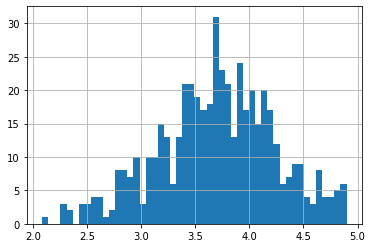

In [10]:
# Create a histogram of sample means
poll_means['means'].hist(bins = 50);

This is fairly normally distributed. If we were to collect even more samples (let's say around 50,000), our histogram would more closely approach the shape of a bell curve. Further, the mean of this _**distribution of sample means**_ will closely reflect the actual population mean. 

[Back to top](#Index:) 
<a id='q1'></a>

### Question 1
*5 points*

Calculate the mean and standard deviation of the `poll_means` sampling distribution below using `NumPy`'s mean and standard deviation functions.  Assign the result of the mean as a float to `ans1_a` and the result of the standard deviation as a float to `ans1_b`.

In [11]:
### GRADED

### YOUR SOLUTION HERE
ans1_a = poll_means.mean()
ans1_b = poll_means.std()

###
### YOUR CODE HERE
###


In [12]:
ans1_b

means    0.544634
dtype: float64

In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Why is this important?
As a data scientist, the central limit theorem is an important motivator for the strategies you will use to collect samples of data. You will rarely have the opportunity to interact with data about an entire population. You do; however, have the ability to choose your sampling methodology and assess the quality of your sample data.

In the polling example, this is done in two key ways:
- **Collecting a wide variety of data points representing the variation in the population.** If a researcher only surveys people near the mall on a Saturday, they will likely not capture the variety of opinion present in the population.
- **Ensuring each sample size is sufficiently large**
The quality and size of each sample collected is just as important as the number of samples collected. Take a look at the following set of graphs, which simulates the difference between the accuracy of sampling distributions with random samples of n=5 and n=25 taken from the population.

![CLTexample](https://cpb-us-e1.wpmucdn.com/you.stonybrook.edu/dist/8/663/files/2017/03/CLTexample-2j66f7h.gif "segment")

The sampling distribution with samples of n=25 are much closer to the actual population mean. A sampling distribution with n>25 would further increase this accuracy.

## Estimating the Population Mean

In your work as a data scientist, collecting hundreds or thousands of samples can be prohibitive in terms of time and cost. Most often, you will want to _estimate_ the population mean given data from a number of data points in a single sample, or a small number of samples.

Let's examine a sample of recent job postings with New York City government. Each of the rows in this data set represents details about an individual job post, with one row per posting. 

In [14]:
# Load the jobs data set
jobs = pd.read_csv("data/jobs.csv")

# Examine the first few rows 
jobs.head()

,job_id,title,agency,posting_date,salary_from,salary_to
0,378085,HVAC Service Technic,DEPT OF HEALTH/MENTAL HYGIENE,2018-12-21,385.0,385.0
1,377919,"Psychologist, Level",POLICE DEPARTMENT,2018-12-31,62458.0,81131.0
2,379321,Asset Manager,HOUSING PRESERVATION & DVLPMNT,2019-01-07,52524.0,60000.0
3,378658,Public Health Adviso,DEPT OF HEALTH/MENTAL HYGIENE,2019-01-02,37957.0,47142.0
4,321570,"Deputy Commissioner,",DEPT OF ENVIRONMENT PROTECTION,2018-01-26,209585.0,209585.0


The `salary_from` and `salary_to` columns depict the lower and upper bounds of the pay range for the job position. Let's take a look at the mean, standard deviation, and sample size of `salary_to`.

In [15]:
# Calculate the mean, standard deviation, and sample size
print("Mean = ",np.mean(jobs['salary_to']))
print("SD = ",np.std(jobs['salary_to']))
print("Number of records = ", jobs['salary_to'].count())

Mean =  81819.9124
SD =  36274.58658027882
Number of records =  200


We know that there are 200 data points in this sample, and that the upper bound of the salary range for these 200 data points has a mean of $81,820. 

Does this mean that we can conclude all city government jobs to have an average salary of $81,820? _No_ , we cannot responsibly say this based on a fraction of the population of New York City government job positions and their salaries. We don't know how **representative** this sample is compared to the population.

However, we do have some tools that we can use and compare to _estimate_ the population mean. We will review some of these useful concepts below.

##### Z-scores
- A Z-score is a _standardized_ score representing the position of an individual value compared to the rest of the values in the distribution. 

- A Z-score's value indicates the number of standard deviations _above_ or _below_ the mean that an individual score lies. If you take a standardized test such as the GRE, you can calculate a Z-score that tells you how far above or below the mean your score is in relation to others who took the test. A test result with a Z-score of 1 is 1 standard deviation above the mean.

- Z-scores are used to calculate the _percentile_ value of a score. If you take the GRE, you will receive both a raw score and a percentile rank as part of your result. A result that places you in the _68th percentile_ is calculated using a Z-score.

- Z-scores are an important part of calculating a confidence interval, because they allow us to calculate how _confident_ we are that the real population mean lies between two values.

#### The 95% Confidence Interval for the Population Mean

In essence, a 95% confidence interval for estimating the population mean allows us to say, _"Based on the sample data's mean and variation, we are 95% confident that the real population mean is between these two values."_

Using three key pieces of information about our sample, we can estimate the _interval_ in which the population mean lies to a degree of _confidence_ (thus, the term _Confidence Interval_ ). Take a look at the following equation used to calculate the confidence interval for the population mean:

$$CI = \bar{x} \pm Z_{\alpha/2} * \frac{\sigma}{\sqrt{n}}$$


Let's break this down. The _confidence interval_ is a set of two values calculated by taking the **sample mean** $\bar{x}$, plus or minus the **Z-score** $Z_{\alpha/2}$ for the % confidence interval, multiplied by the sample's **standard error** $\frac{\sigma}{\sqrt{n}}$. 

In order to calculate the z-scores associated with percentile values, you can use a standard normal table like [this one](http://www.z-table.com/). Each z-score provides you with the percentage of scores _below_ that value. When identifying the appropriate z-score for a confidence interval, keep in mind that you need to divide the alpha level (1 - confidence interval) by 2. A 90% confidence interval includes a 10% range of values _in total_ -- 5% above, and 5% below the mean. Thus, you are looking for the z-score associated with the 95th percentile for this interval.

The table below depicts the z-scores necessary for calculating the most commonly used confidence intervals (90%, 95%, and 99%). 

| CI  | Z-Score |
|-----|---------|
| 90% | 1.645   |
| 95% | 1.96    |
| 99% | 2.575   |


All of these values can be easily calculated using `stats` from the `scipy` package in Python. Let's import this module below.

In [16]:
# Import stats
import scipy.stats as stats

You can use the `stats.norm.interval()` function to calculate z-scores associated with your selected confidence interval. Let's calculate the z-scores associated with the 95% confidence interval below.

In [17]:
# Calculate z-scores for a 95% CI
print(stats.norm.interval(0.95))

(-1.959963984540054, 1.959963984540054)


#### Computing our Confidence Interval
Let's start filling in our equation to estimate the population mean for the `salary_to` column in the `jobs` data set. We determined earlier that the sample mean is $81,819.91 (rounded to 81,820). Let's add this to our equation.

$$CI = 81820 \pm Z_{\alpha/2} * \frac{\sigma}{\sqrt{n}}$$

Next, let's choose our confidence interval and add it to the equation. We'll start with 95%, giving us a z-score of _1.96_. Later on we'll adjust the confidence interval to see how the range of values changes. 

$$CI = 81820 \pm 1.96 * \frac{\sigma}{\sqrt{n}}$$

Finally, let's calculate the standard error of the mean. We can do this using the `sem` function from `scipy.stats`.

In [18]:
# Calculate the standard error
stats.sem(jobs['salary_to'])

2571.437264620726

Great! The standard error for this sample is 2,571.44. Let's round this to 2,571 and add it to our equation.

$$CI = 81820 \pm 1.96 * 2571$$

Finally, let's use Python to calculate the _lower_ and _upper bound_ of the confidence interval.

In [19]:
# Calculate the lower and upper bound of the confidence interval
print("Lower bound = ", 81820 - (1.96 * 2571))
print("Upper bound = ", 81820 + (1.96 * 2571))

Lower bound =  76780.84
Upper bound =  86859.16


Fantastic! We are 95% confident that the population mean for the upper salary range is between 76,780.84 and 86,859.16.

In general, the smaller the interval, the more accurately we are able to identify the real population mean. There are several parts of this equation that we can adjust in order to adjust the range of values.

First, let's take a look at what happens when we change the confidence interval from 95% to 90% (representing a Z-score of 1.645). We can use `stats.norm.interval()` to calculate the confidence interval in a single step.

When calculating non-standard intervals with `stats.norm.interval()`, you will need to input information for 3 arguments -- the confidence interval, the `loc` (location of the mean), and `scale` (the standard error of the mean). Let's input these below for our 95% CI.

In [20]:
# Calculate the confidence interval
stats.norm.interval(0.95, loc=np.mean(jobs['salary_to']), scale=stats.sem(jobs['salary_to']))

(76779.98797283918, 86859.83682716082)

You'll notice that the values are close, but not identical. This is because we rounded our mean and standard error to the nearest whole number when calculating it in multiple steps.

Now let's change the first argument to 0.90, representing our 90% confidence interval.

In [21]:
# Calculate the confidence interval
stats.norm.interval(0.90, loc=np.mean(jobs['salary_to']), scale=stats.sem(jobs['salary_to']))

(77590.27448881042, 86049.55031118958)

The range of values is smaller than the 95% confidence interval. With this result, we can say that we are 90% confident that the true population mean for the upper salary range lies between 77,590 and 86,049.

There are two key components of the equation that you can impact as a data scientist that will lead to a smaller, more accurate range of values. First, you can impact the equation by simply collecting more data. You'll recall that the original data set has 200 data points. If you were to collect data about another 300 job postings (bringing your total sample size to 500), the denominator of the standard error would greatly increase, thus reducing the size of your standard error overall.

$$CI = \bar{x} \pm Z_{\alpha/2} * \frac{\sigma}{\sqrt{n}}$$

The second choice you can make as a data scientist is in the appropriate confidence interval to choose. Depending on your question of interest (i.e., are you estimating job salaries or the effectiveness of a new life-saving drug?), you may want to adjust the percentage of your confidence interval in order to narrow your range. 

[Back to top](#Index:) 
<a id='q2'></a>

### Question 2
*5 points*


The `jobs` data set also has a column indicating the _lower_ bound of the salary range for a specific job, called `salary_from`.Calculate the mean and standard deviation of this column using appropriate `numpy` functions to make your calculations. Assign the values of the mean as a float to `ans2_a` and the value of the standard deviation to `ans2_b`.

In [22]:
### GRADED

### YOUR SOLUTION HERE
ans2_a = None
ans2_b = None

###
### YOUR CODE HERE
###


In [23]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q3'></a>

### Question 3
*5 points*

If you are calculating a 90% confidence interval to estimate the population mean, what z-score value do you need to use? Assign you asnwer, accurate to 3 decimal places, to `ans3`.

In [24]:
### GRADED

### YOUR SOLUTION HERE
ans3 = None


###
### YOUR CODE HERE
###


In [25]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q4'></a>

### Question 4
*5 points*
    
Calculate the 99% confidence interval to estimate the population mean of `salary_from`. Assign your result as a tuple to `ans4`.

In [26]:
### GRADED

### YOUR SOLUTION HERE
ans4 = None


###
### YOUR CODE HERE
###


In [27]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q5'></a>

### Question 5
*5 points*
    
Calculate the error term **_E_**, for the `salary_from` column using a 90% confidence interval. Recall the formula to calculate the error term:

$$E = Z_{\alpha/2} * \frac{\sigma}{\sqrt{n}}$$

Assign the result as a float to `ans5`.

Note: *If* you choose to calculate standard error using standard deviation, you will need to set an additional parameter in your code: `ddof=1` 

In [28]:
### GRADED

### YOUR SOLUTION HERE
ans5 = None

jobs
###
### YOUR CODE HERE
###


,job_id,title,agency,posting_date,salary_from,salary_to
0,378085,HVAC Service Technic,DEPT OF HEALTH/MENTAL HYGIENE,2018-12-21,385.00,385.00
1,377919,"Psychologist, Level",POLICE DEPARTMENT,2018-12-31,62458.00,81131.00
2,379321,Asset Manager,HOUSING PRESERVATION & DVLPMNT,2019-01-07,52524.00,60000.00
3,378658,Public Health Adviso,DEPT OF HEALTH/MENTAL HYGIENE,2019-01-02,37957.00,47142.00
4,321570,"Deputy Commissioner,",DEPT OF ENVIRONMENT PROTECTION,2018-01-26,209585.00,209585.00
...,...,...,...,...,...,...
195,374978,Construction Project,DEPARTMENT OF TRANSPORTATION,2018-12-13,55416.00,83151.00
196,367738,ELECTRICIAN,DEPARTMENT OF SANITATION,2018-11-13,389.97,389.97
197,382741,EHS Program Manager,DEPT OF ENVIRONMENT PROTECTION,2019-02-04,52137.00,144413.00
198,230974,Best Practices Coach,ADMIN FOR CHILDREN'S SVCS,2016-08-04,66000.00,89008.00


In [29]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Calculating the Minimum Sample Size

Exactly how many data points do you need to confidently estimate the population mean within a given confidence interval? This is a crucial decision that you will face on a regular basis in your data science journey. To determine the minimum sample size, _**n**_ for estimating the population mean, we can use the following formula:

$$n = (\frac{Z_{\alpha/2} * {\sigma}}{E})^2$$

Let's break this down. The _numerator_ of this equation is very similar to the CI formula. The Z-score for the confidence interval is multiplied by the sample's standard deviation. The _denominator_ of the equation, **_E_**, represents your _desired_ degree of error to estimate the mean. Let's say we want to estimate the average upper salary range within ± $5,000.

$$E = 5000$$

Thus, we can combine several of the pieces of information we calculated earlier into this new equation. Let's start by selecting the Z-score for a 95% confidence interval.

$$n = (\frac{1.96 * {\sigma}}{5000})^2$$

Let's now incorporate the standard error calculated earlier, which was 2,571.

$$n = (\frac{1.96 * {\sigma}}{5000})^2$$

Finally, let's use `numpy` for calculating the standard deviation to incorporate into the numerator of this equation. 

In [30]:
# Calculate the standard deviation
print(np.std(jobs['salary_to']))

36274.58658027882


Our final equation with all values included looks like this:

$$n = (\frac{1.96 * {36365}}{5000})^2$$

Let's plug this equation into Python, separating the numerator and denominator into separate objects called `a` and `E`.

In [31]:
# Numerator
a = 1.96 * 36365

# Denominator
E = 5000

# Calculate the recommended minimum sample size
n = (a / E)**2

# Print the recommended minimum sample size
print(n)

203.20730580639997


Interesting! Based on the 95% confidence interval, it seems our actual sample size of 200 is just below the recommended minimum necessary to accurately estimate the population mean within ± $5,000. 

What if we want to estimate the mean of the upper salary range within $500?

In [32]:
# Numerator
a = 1.96 * 36365

# Denominator
E = 500

# Calculate the recommended minimum sample size
n = (a / E)**2

# Print the recommended minimum sample size
print(n)

20320.730580639996


In order to narrow the scope of our estimate, we would need to collect a lot more data!

#### How is this determined?
The minimum sample size is determined based on three key pieces of information -- the mean, the standard deviation, and the _desired standard error of the mean_. Thus, the relationship between the data's average and its variation determine how many data points are necessary to fully capture the variation. Take a look at the distribution of `salary_to`.

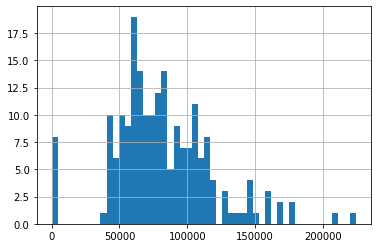

In [33]:
# Create a histogram of salary data
jobs['salary_to'].hist(bins = 50);

The distribution is fairly skewed, and it seems like there are several key outliers present in the data set. A sample that more closely reflects a normal distribution is assumed to more accurately reflect the broader population as a whole.

[Back to top](#Index:) 
<a id='q6'></a>

### Question 6
*5 points*

Calculate the minimum sample size necessary to accurately estimate the 90% confidence interval of the population mean of `salary_from` to within ± $2,500. Recall the formula below:

$$n = (\frac{Z_{\alpha/2} * {\sigma}}{E})^2$$

Assign your result as a float to `ans6`.

In [34]:
### GRADED

### YOUR SOLUTION HERE
ans6 = None


###
### YOUR CODE HERE
###


In [35]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q7'></a>

### Question 7
*5 points*

Decide whether the following statement is `True` or `False`.

 The recommended minimum sample size to estimate the population mean will increase as you increase your confidence interval. 
 
 Assign boolean to `ans7`below.

In [36]:
### GRADED

### YOUR SOLUTION HERE
ans7 = None


###
### YOUR CODE HERE
###


In [37]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Sampling Strategies
The methods you use to collect sample(s) of data impact the quality of your results as significantly as the size of your sample. Sampling methods are broadly categorized as _probability sampling_ and _non-probability sampling_. We'll outline several key methods of sampling here along with key Python functions to explore & assess data in accordance with each technique.

### Simple random sampling

**Simple random sampling** involves selecting data points from a population based on pure random chance. This is rarely possible when you are actively collecting data about a large general population (i.e., all American adults), but it may be an effective means of drawing conclusions about big data when you don't have the bandwidth for population-level analyses (i.e., you can draw random samples of data from a credit card company's list of transactions). 

In Python, you can draw a random sample of a data frame using `sample`, specifying the size of the sample and whether you want to sample with or without replacement. Let's select a sample of 8 job postings without replacement.

In [38]:
# Draw a sample of 8 job postings
jobs.sample(n=8, replace = False)

,job_id,title,agency,posting_date,salary_from,salary_to
90,277372,Project Manager,DEPT OF ENVIRONMENT PROTECTION,2017-01-09,47974.0,55170.0
86,363983,IT Helpdesk Manager,DEPARTMENT OF CORRECTION,2018-09-05,75000.0,95000.0
56,377502,"Senior Data Manager,",DEPT OF HEALTH/MENTAL HYGIENE,2018-12-17,73305.0,84301.0
197,382741,EHS Program Manager,DEPT OF ENVIRONMENT PROTECTION,2019-02-04,52137.0,144413.0
192,352087,ASSOCIATE STAFF ANAL,NYC EMPLOYEES RETIREMENT SYS,2018-07-13,65731.0,80000.0
96,382885,"Deputy Director, Tim",DEPT OF DESIGN & CONSTRUCTION,2019-02-04,62862.0,97873.0
2,379321,Asset Manager,HOUSING PRESERVATION & DVLPMNT,2019-01-07,52524.0,60000.0
105,356713,Civil Engineer 2,DEPARTMENT OF TRANSPORTATION,2018-08-15,74990.0,104182.0


### Stratified random sampling
**Stratified random sampling** involves collecting a sample of data in accordance with the proportions present in a group. This is an important strategy to use when surveying groups that represent a smaller proportion of the population (i.e., racial/ethnic minority groups). You are more likely to encounter members of a predominant group by pure random chance, leading to an underrepresentation of smaller proportions of the population.

In Python, you can examine the total number of rows per group using the pandas `groupby` method and `count`.

In [39]:
# Count number of records by agency
jobs.groupby('agency').count()

,job_id,title,posting_date,salary_from,salary_to
agency,,,,,
ADMIN FOR CHILDREN'S SVCS,4,4,4,4,4
ADMIN TRIALS AND HEARINGS,3,3,3,3,3
BUSINESS INTEGRITY COMMISSION,1,1,1,1,1
CONSUMER AFFAIRS,2,2,2,2,2
DEPARTMENT OF BUILDINGS,2,2,2,2,2
DEPARTMENT OF BUSINESS SERV.,8,8,8,8,8
DEPARTMENT OF CITY PLANNING,3,3,3,3,3
DEPARTMENT OF CORRECTION,3,3,3,3,3
DEPARTMENT OF INVESTIGATION,6,6,6,6,6


After grouping your data, you can choose the appropriate number of records to sample from each group. Since several of the city agencies listed only have 1 or 2 job postings, let's select 1 job post from each agency at random to display.

In [40]:
# Select 1 random job post from each agency
jobs.groupby('agency').agg(pd.DataFrame.sample)

,job_id,title,posting_date,salary_from,salary_to
agency,,,,,
ADMIN FOR CHILDREN'S SVCS,311540,Senior Buyer,2019-02-04,47450.00,89008.00
ADMIN TRIALS AND HEARINGS,375711,Deputy Branch Manage,2018-12-11,37217.00,53616.00
BUSINESS INTEGRITY COMMISSION,357984,Computer Systems Man,2018-08-08,80000.00,85000.00
CONSUMER AFFAIRS,382439,Senior Community Imp,2018-12-10,52524.00,80000.00
DEPARTMENT OF BUILDINGS,381078,Senior Background In,2019-01-28,49123.00,95000.00
DEPARTMENT OF BUSINESS SERV.,375332,"EXECUTIVE DIRECTOR,",2018-10-16,52524.00,67000.00
DEPARTMENT OF CITY PLANNING,359133,Regional Planner,2018-08-27,55000.00,65000.00
DEPARTMENT OF CORRECTION,374422,"Manager, Application",2018-06-08,100000.00,95000.00
DEPARTMENT OF INVESTIGATION,374494,Confidential Investi,2018-12-22,41996.00,50000.00


### Snowball sampling
**Snowball sampling** is a _non-probabilistic method_ of data collection primarily used when you are interested in information about a specific subset of the population that shares 1 or more characteristic. If you are a data scientist predicting rates of cancer reoccurrence among adults over 60 in Los Angeles, randomly sampling the population to find these individuals will be cost and time prohibitive. 

If your population of interest is difficult to access and not randomly present in the general population, you will likely have more success in creating an impact on your population by recruiting a few individuals from that population (i.e., through advertisement) and then requesting your study participants refer others within the same population.

### Convenience Sampling
**Convenience sampling** is a method often used when a research or data science team is seeking research participants with the greatest availability and willingness to participate in a study. Findings from this type of method should be interpreted with caution, because they likely do not represent the broader population.

Let's take a look at our `jobs` data set. We could more easily survey city agency employees with the title _Analyst_ because they work in central offices, but their salary likely does not represent the mean for all city employees.

In [41]:
# Filter for only Analyst job titles
analysts = jobs[jobs['title'].str.contains("Analyst")]

# Print and compare analyst to overall salary means
print("Overall salary mean =",np.mean(jobs['salary_to']))
print("Analyst salary mean =",np.mean(analysts['salary_to']))

Overall salary mean = 81819.9124
Analyst salary mean = 78276.875


[Back to top](#Index:) 
<a id='q8'></a>

### Question 8
*10 points*

Take a look at the following code, which draws a simple random sample of job posts from the `jobs` dataframe. 

The loop takes a random sample of 10 job posts, calculates the percentage of jobs that were listed by the Department of Health & Mental Hygiene (DOHMH), and appends it to a list called `doh`. This process is then repeated 10 times.

Based on the code below, calculate the mean percentage in each list. What percentage of job posts would you estimate are posted by DOHMH? Would this change if you changed the number of samples to 100 and the sample size to 25? How about if you changed it to 500 samples with a sample size of 100?

- a) The mean percentage of job posts across samples stays the same with each sample size increase
- b) The mean percentage of job posts across samples gets larger with each sample size increase
- c) The mean percentage of job posts varies more greatly at `n = 10`, and is relatively similar at `n = 25` and `n = 100`.
- d) The mean percentage of job posts varies more with each sample size increase

Assign the letter associated with your answer choice as a string the `ans8` below.

In [42]:
# Create empty list
dohmh = []

# Repeat each step x amount of times
for i in range(0,10):
    # Draw a sample of n job postings
    s = jobs.sample(n=10, replace = True)
    # Group and count by agency
    s = s.groupby('agency').count()
    # Calculate the percentage of posts by agency
    s['pct'] = s['job_id'] / s['job_id'].sum()
    # Append the percent in the Dept. of Health to list
    if s.index.contains('DEPT OF HEALTH/MENTAL HYGIENE'):
        dohmh.append(s.loc['DEPT OF HEALTH/MENTAL HYGIENE','pct'])
    else:
        dohmh.append(0)
        
print(np.mean(dohmh))

AttributeError: 'Index' object has no attribute 'contains'

In [43]:
from ipywidgets import interact
import ipywidgets as widgets

In [44]:
jobs['high_salary'] = np.where(jobs['salary_to']>=100_000, 1, 0)

In [48]:
def sample_taker(num_samples, sample_size, bins ):
    mean_list = []

    for i in range(0,num_samples):
        s = jobs['high_salary'].sample(n = sample_size, replace=True)
        mean_list.append(s.mean())

    #print(mean_list)
    plt.hist(mean_list, bins=bins)

In [49]:
from ipywidgets import interact
import ipywidgets as widgets

In [50]:
interact(sample_taker, num_samples = widgets.IntSlider(min = 0, max = 1000, step = 1),
        sample_size = widgets.IntSlider(min = 1, max = 1000, step = 1),
        bins = widgets.IntSlider(min = 1, max = 200, step = 1))

interactive(children=(IntSlider(value=0, description='num_samples', max=1000), IntSlider(value=1, description=…

<function __main__.sample_taker(num_samples, sample_size, bins)>

In [44]:
### GRADED

### YOUR SOLUTION HERE
ans8 = None

###
### YOUR CODE HERE
###


In [45]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Great job!


[Back to top](#Index:) 
<a id='q9'></a>

### Question 9
*10 points*

Modify the code in Question 8 to draw a series of random samples from the `jobs` data set in order to estimate the number of job postings with an upper salary range of $100,000 or more.

Complete the following steps inside your `for` loop to calculate the percentage of high salary job postings per sample:
- Create a new column with a binary indicator of high salary or not
- Take the mean of the new column to determine the percentage of high salary jobs per sample
- Append the mean to the list, `sal`.
- Increase the range and `n` as you see fit to create a large enough list & sample size.

Based on this method, what would you estimate is the average number of job postings with an upper salary of $100k or more?
- a) 28%
- b) 32%
- c) 24%
- d) 22%
- e) 30%

Assign the letter associated with your answer choice to the `ans9` object in the second cell below.

In [46]:
### GRADED

### YOUR SOLUTION HERE
ans9 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Interactive Two Proportion z-test

In [112]:
from ipywidgets import interact
import ipywidgets as widgets

In [113]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [114]:
def two_tester(n1, n2, p1, p2):

    population1 = np.random.binomial(1, p1, n1)
    population2 = np.random.binomial(1, p2, n2)

    mean = 0; std = 1; variance = np.square(std)
    x = np.arange(-3.5,3.5,.01)
    f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))
    plt.plot(x,f)
    plt.ylabel('gaussian distribution')
    plt.axvline(1.96, color='red')
    plt.axvline(-1.96, color='red')
    
    z_line = sm.stats.ztest(population1, population2)[0]
    if abs(z_line) > 1.96:
        color = 'green'
    else:
        color = 'orange'
    
    plt.axvline(z_line, color=color)
    plt.show()
    
    return sm.stats.ztest(population1, population2)

In [117]:
interact(two_tester, n1 = widgets.IntSlider(min = 1, max = 1000, step = 1),
        n2 = widgets.IntSlider(min = 1, max = 1000, step = 1),
        p1 = widgets.FloatSlider(min = 0, max = 1, step = 0.01),
        p2 = widgets.FloatSlider(min = 0, max = 1, step = 0.01))

interactive(children=(IntSlider(value=1, description='n1', max=1000, min=1), IntSlider(value=1, description='n…

<function __main__.two_tester(n1, n2, p1, p2)>

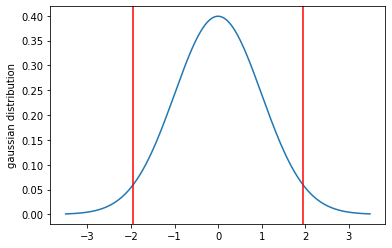

In [91]:
mean = 0; std = 1; variance = np.square(std)
x = np.arange(-3.5,3.5,.01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))
plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.axvline(1.96, color='red')
plt.axvline(-1.96, color='red')
plt.show()


In [20]:
import scipy.stats as st
st.norm.ppf([.05,.95])


array([-1.64485363,  1.64485363])

In [22]:
import numpy as np

std = None
E = 89.03
mu = 109.37
n = 75
std = np.sqrt(75) * E

In [23]:
std

771.0224169892858

In [25]:
a = std/np.sqrt(n)

In [26]:
a

89.03

Text(0, 0.5, 'Normal Distribution')

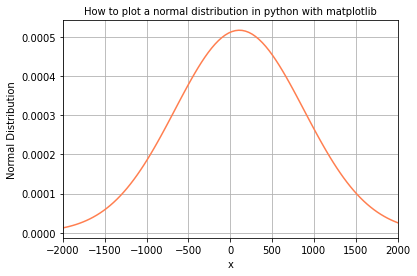

In [39]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

n = 75
se = 89.03
x_min = -2000
x_max = 2000

mean = 109.37 
std = se * np.sqrt(75)

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='coral')

plt.grid()

plt.xlim(x_min,x_max)
#plt.ylim(0,0.25)

plt.title('How to plot a normal distribution in python with matplotlib',fontsize=10)

plt.xlabel('x')
plt.ylabel('Normal Distribution')

In [45]:
Z = 1.96
std = se * np.sqrt(n)
E = 5

n = ((Z * std)/E)**2

In [46]:
n

1483507.552313902